In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl
import json


with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None


In [3]:
#zamiana z metrów na km
df["distance_to_metro"] = df["distance_to_metro"].apply(lambda x: round(x/1000, 3))
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8.794,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14.444,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7.791,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4.281,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,0.540,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,0.478,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,0.478,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,0.511,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,0.511,2002.0,True,6,False,1380000.0,20000.00,None


In [4]:
df.isnull().sum()

area                     0
distance_to_metro        0
build_year             706
has_parking              0
floor                    0
is_new                   0
price                    0
price_m2                 0
date_added           10058
dtype: int64

In [5]:
df.describe()[1:].apply(lambda x: round(x, 3))

,area,distance_to_metro,build_year,floor,price,price_m2
mean,60.039,2.219,1995.803,3.193,1.155377e+06,18872.345
std,36.656,2.096,29.282,3.127,9.496621e+05,6421.052
min,14.530,0.001,1820.000,-1.000,7.820000e+02,13.030
25%,40.592,0.623,1972.000,1.000,6.900000e+05,14900.000
50%,52.440,1.551,2006.000,2.000,8.740625e+05,17526.320
75%,68.000,3.215,2023.000,4.000,1.262000e+06,21242.858
max,1892.030,14.568,2027.000,45.000,1.700000e+07,170000.000


<Axes: xlabel='is_new', ylabel='count'>

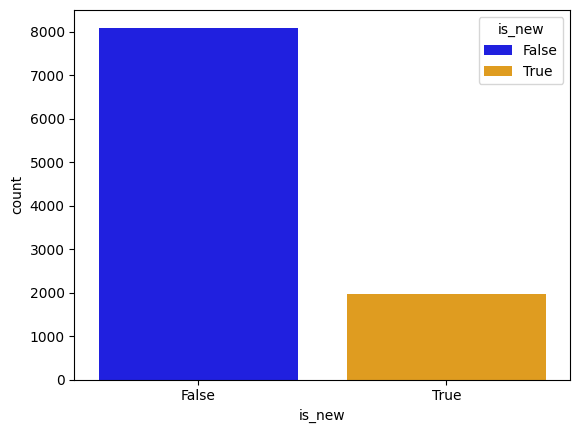

In [6]:
#ilość nowych i starych ogłoszeń 
sns.countplot(x = df["is_new"], hue = df.is_new, palette=["blue", "orange"])

<Axes: xlabel='has_parking', ylabel='count'>

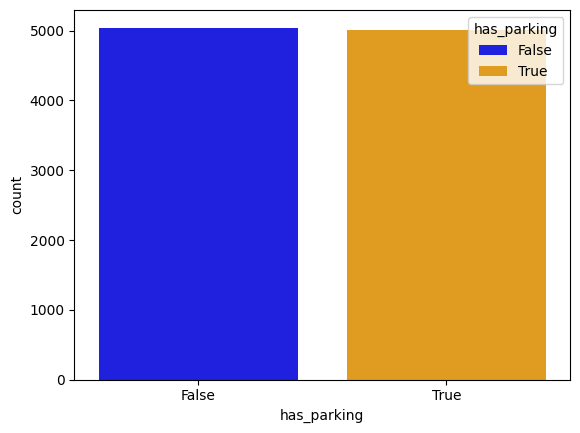

In [7]:
#ilość ogłoszeń, które zawierają parking lub nie
sns.countplot(x = df["has_parking"], hue = df.has_parking, palette=["blue", "orange"])

(0.0, 250.0)

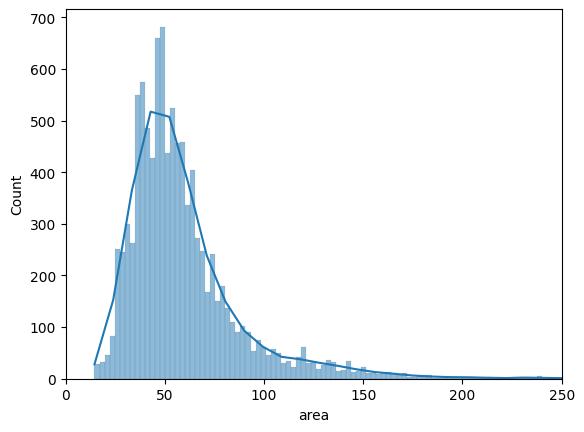

In [8]:
#Wizualizacja rozkładu powierzchni mieszkań
sns.histplot(x= df.area, kde = True)
mpl.xlim(0,250)

<Axes: xlabel='floor', ylabel='Density'>

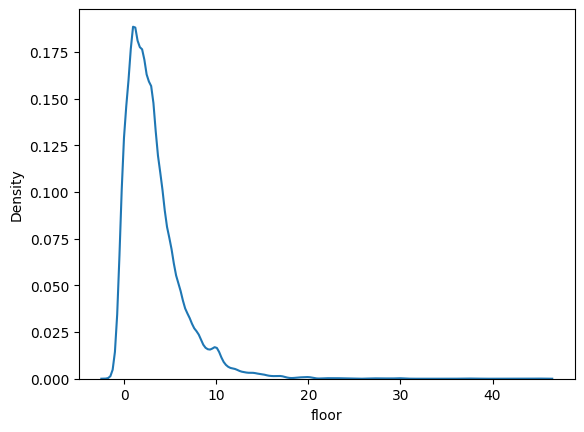

In [9]:
#Wizualizacja rozkładu pięter
sns.kdeplot(x = df["floor"])

(5000.0, 50000.0)

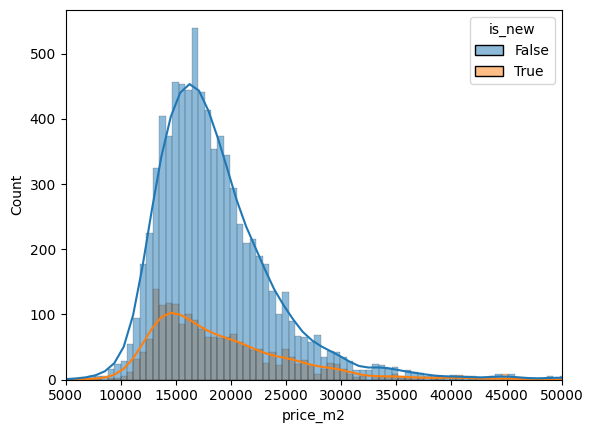

In [10]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od długości trwania ogłoszenia)
sns.histplot(x = df["price_m2"], kde=True, hue=df["is_new"])
mpl.xlim(5000, 50000)

(5000.0, 50000.0)

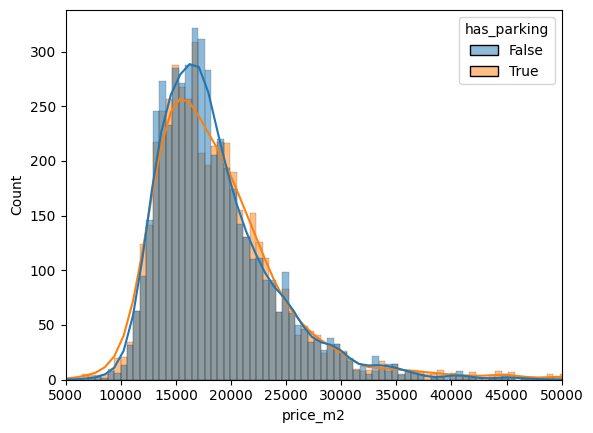

In [11]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)
sns.histplot(x = df["price_m2"], kde=True, hue=df["has_parking"])
mpl.xlim(5000, 50000)

<Axes: xlabel='distance_to_metro', ylabel='Count'>

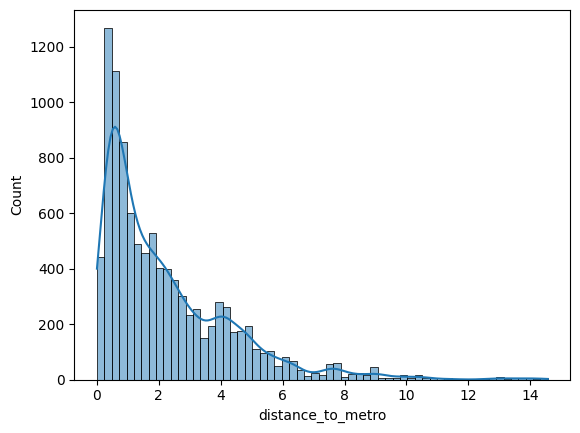

In [12]:
#Wizualizacja rozkładu odległości od metra
sns.histplot(x=df.distance_to_metro, kde=True)

(0.0, 8.0)

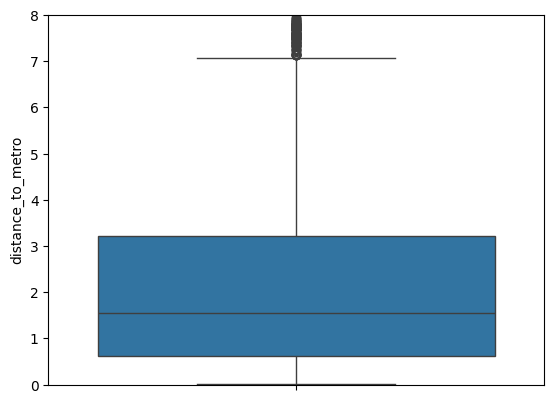

In [13]:
#Boxplot rozkładu odległości od metra
sns.boxplot(y = df.distance_to_metro)
mpl.ylim(0, 8)

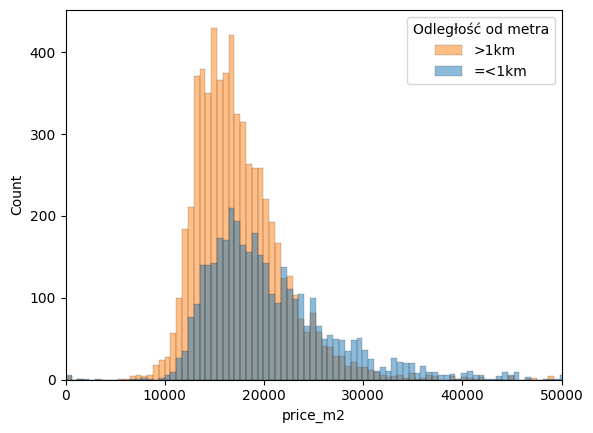

In [14]:
#zależność miedzy ceną za metr kwadratowy a odległością od metra

sns.histplot(x= df.price_m2 ,hue = df.distance_to_metro.apply(lambda x: x > 1))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

(1900.0, 2037.35)

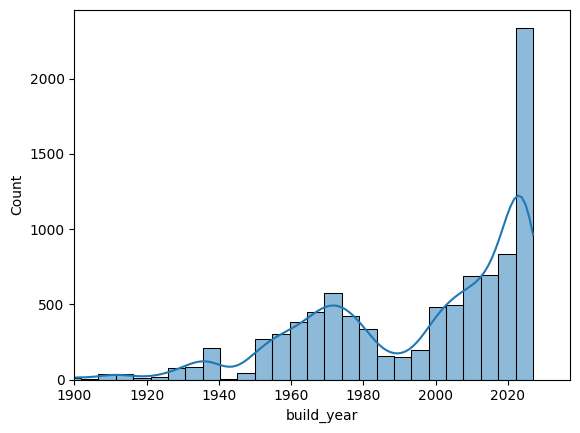

In [15]:
#Wizualizacja rozkładu roku wybudowania mieszkania
sns.histplot(x = df.build_year, kde = True)
mpl.xlim(1900,)

<Axes: ylabel='build_year'>

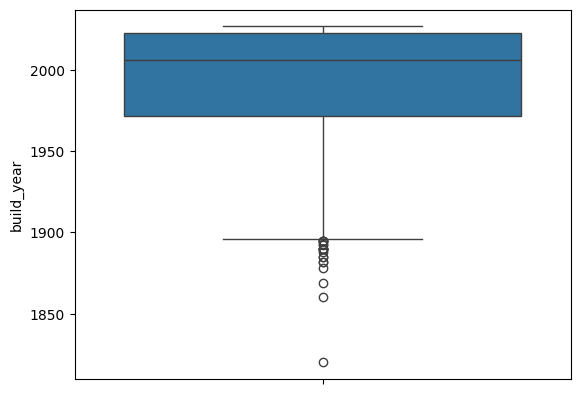

In [16]:
#Boxplot rozkładu daty wubudowania
sns.boxplot(y = df.build_year)

In [2]:

from sklearn.impute import SimpleImputer

df_processed = df.drop(columns=["price","date_added"])
imputer = SimpleImputer(strategy="mean", copy=True)


df_processed["build_year"] = imputer.fit_transform(df_processed)
df_processed.isnull().sum()



area                 0
distance_to_metro    0
build_year           0
has_parking          0
floor                0
is_new               0
price_m2             0
dtype: int64

In [3]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score,davies_bouldin_score

def calculate_scores(data, labels, dict):
    dict["Calinski-Harabasz"].append(calinski_harabasz_score(X=data, labels=labels))
    dict["Silhouette"].append(silhouette_score(X=data, labels=labels))
    dict["Davies-Bouldin"].append(davies_bouldin_score(X=data, labels=labels))

In [19]:
Kmeans_res = {"clusters":range(10,301,10), "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "WCSS": []}
#kmeans.inertia_  - WCSS (Within-Cluster Sum of Squares)

for clusters in Kmeans_res["clusters"]:

    kmeans = KMeans(n_clusters= clusters, max_iter= 500, random_state=42)
    #fit_transform - odl od centroidów
    #fit_predict - label 

    kmeans.fit(df_processed)
    calculate_scores(df_processed,kmeans.labels_, Kmeans_res)
    Kmeans_res["WCSS"].append(kmeans.inertia_)


In [20]:
df_results = pd.DataFrame(Kmeans_res)
df_results.set_index("clusters", inplace=True)

df_results.head(10)

,Calinski-Harabasz,Silhouette,Davies-Bouldin,WCSS
clusters,,,,
10,26523.905560,0.516039,0.489396,1.674956e+10
20,55067.676820,0.526594,0.445192,3.940690e+09
30,92747.869257,0.530834,0.460645,1.540462e+09
40,129386.080087,0.522406,0.467528,8.218494e+08
50,161308.182372,0.528793,0.475593,5.245628e+08
60,197928.072642,0.530059,0.478696,3.547730e+08
70,234185.267950,0.522557,0.481880,2.561888e+08
80,267431.351171,0.517294,0.477021,1.957933e+08
90,296482.444337,0.507044,0.492562,1.566044e+08


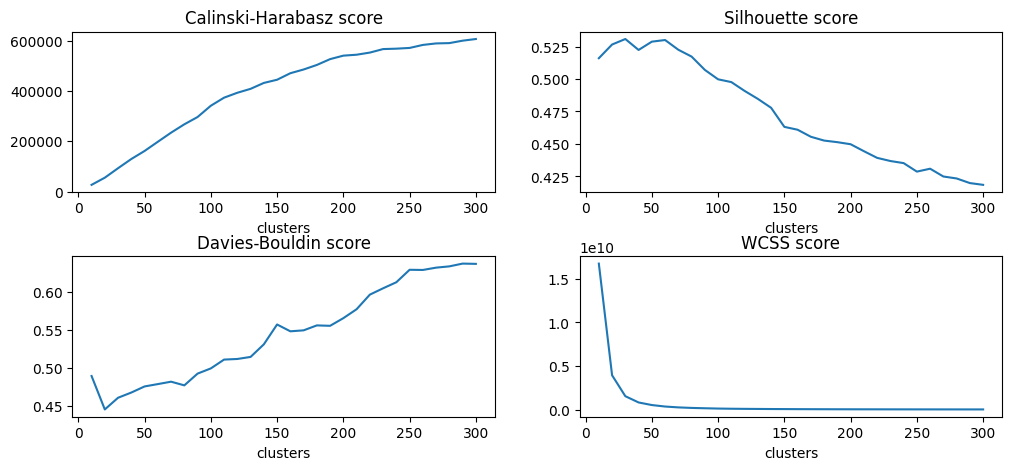

In [21]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

for idx, score in enumerate(df_results.columns):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=df_results.index, y=df_results[score], ax=axes[posx, posy])
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.4)



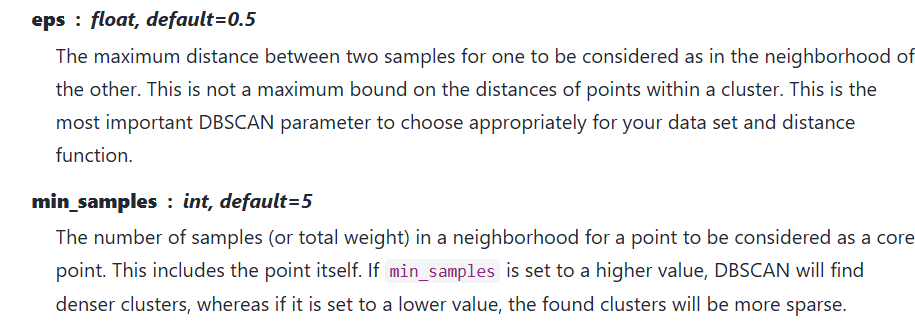

In [4]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler


lof = LocalOutlierFactor()
outliers = lof.fit_predict(df_processed)
df_cleaned = df_processed[outliers == 1]  

scaler = StandardScaler()
df_cleaned.loc[:] = scaler.fit_transform(df_cleaned) 

df_cleaned


C:\Users\mateu\AppData\Local\Temp\ipykernel_2844\1354385361.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.00707866 1.00707866 1.00707866 ... 1.00707866 1.00707866 1.00707866]' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:] = scaler.fit_transform(df_cleaned)
C:\Users\mateu\AppData\Local\Temp\ipykernel_2844\1354385361.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03922453 -0.38759982 -1.03922453 ...  0.26402488  0.91564959
 -0.06178747]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[:] = scaler.fit_transform(df_cleaned)
C:\Users\mateu\AppData\Local\Temp\ipykernel_2844\1354385361.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.49340

,area,distance_to_metro,build_year,has_parking,floor,is_new,price_m2
0,2.534735,3.192906,2.534735,1.007079,-1.039225,-0.493410,-1.801945
1,-0.103275,5.929268,-0.103275,1.007079,-0.387600,-0.493410,-0.985351
2,0.033765,2.707167,0.033765,1.007079,-1.039225,2.026713,-0.864426
3,2.460734,1.007673,2.460734,1.007079,-1.039225,2.026713,-1.375332
4,-0.308834,-0.804174,-0.308834,-0.992971,0.264025,-0.493410,-0.556619
...,...,...,...,...,...,...,...
10052,-1.028291,-1.042465,-1.028291,-0.992971,0.264025,-0.493410,-0.437934
10054,1.277398,-0.833972,1.277398,1.007079,0.589837,-0.493410,0.702767
10055,-0.137534,-0.817918,-0.137534,1.007079,0.264025,-0.493410,-0.216251
10056,0.342104,-0.817918,0.342104,1.007079,0.915650,-0.493410,0.198908


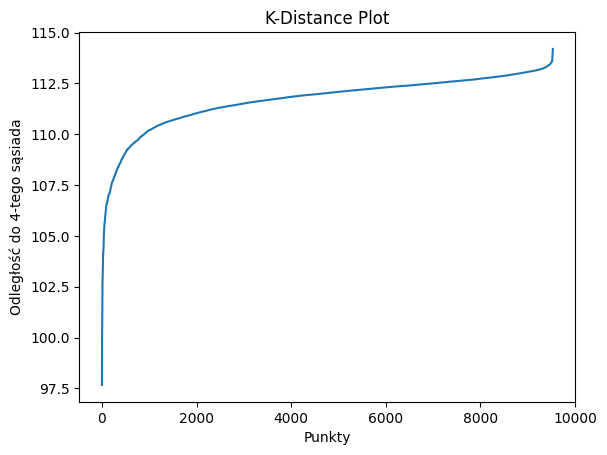

In [23]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors.fit(df_processed)
distances, indices = neighbors.kneighbors(df_cleaned)

sorted_distances = np.sort(distances[:, 3])

mpl.plot(sorted_distances)
mpl.xlabel("Punkty")
mpl.ylabel("Odległość do 4-tego sąsiada")
mpl.title("K-Distance Plot")

mpl.show()



In [7]:

DBScan_res = {"clusters":  [], "Calinski-Harabasz":[], "Silhouette":[],
            "Davies-Bouldin":[], "Noise": []}

#df processed ->  eps ~ 107 a nawet wiecej 
#df_cleaned (df_processed bez outliers i zeskalowane) -> małe epsilony
# większy epsilon - > 
# większy min_samples - > większy noise

epsilon = np.arange(0.5,3.6, 0.2)
min_samples = np.arange(5, 15, 1)

cartesian_product = np.array(np.meshgrid(epsilon, min_samples)).T.reshape(-1, 2)

for epsilon, samples in cartesian_product:     

    dbscan = DBSCAN(eps = epsilon, min_samples= int(samples) , n_jobs = -1)
    dbscan.fit_predict(df_cleaned)

    
    """
    if len(set(dbscan.labels_))> 1:
        calculate_scores(df_processed, dbscan.labels_, DBScan_res)
    else:
        for score in list(DBScan_res.keys())[:-1]:
            DBScan_res[score].append(None
    """
    calculate_scores(df_cleaned, dbscan.labels_, DBScan_res)
    DBScan_res["Noise"].append(np.sum(dbscan.labels_ == -1))
    DBScan_res["clusters"].append(len(set(dbscan.labels_)))



In [12]:
cprod_df = pd.DataFrame(cartesian_product, columns=["epsilon", "min_samples"]) 
dbscan_df = pd.DataFrame(DBScan_res)
df_dbscan_results = pd.concat([cprod_df, dbscan_df], axis = 1)
df_dbscan_results

,epsilon,min_samples,clusters,Calinski-Harabasz,Silhouette,Davies-Bouldin,Noise
0,0.5,5.0,53,135.842227,-0.125231,1.419956,1371
1,0.5,6.0,47,146.533231,-0.089645,1.453598,1527
2,0.5,7.0,36,181.513503,-0.009913,1.388110,1731
3,0.5,8.0,27,225.349379,0.001762,1.417656,1919
4,0.5,9.0,19,303.325713,0.057994,1.531343,2078
...,...,...,...,...,...,...,...
155,3.5,10.0,2,46.998434,0.722427,0.840550,3
156,3.5,11.0,2,46.998434,0.722427,0.840550,3
157,3.5,12.0,2,46.998434,0.722427,0.840550,3
158,3.5,13.0,2,94.247286,0.710356,0.714014,6


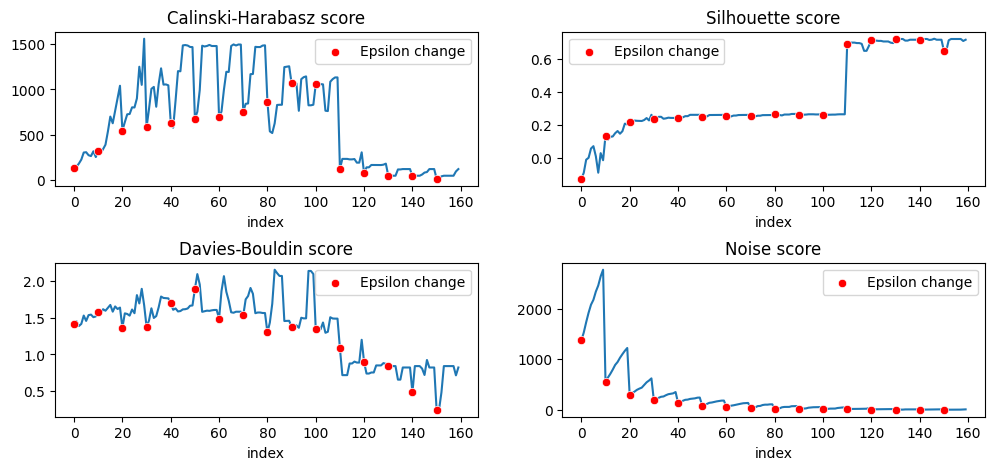

In [13]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

highlight_idx = np.arange(0,160,10)  

for idx, score in enumerate(df_dbscan_results.columns[3:]):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=df_dbscan_results.index, y=df_dbscan_results[score], ax=axes[posx, posy])
    sns.scatterplot(x = df_dbscan_results.index[highlight_idx], y =df_dbscan_results[score][highlight_idx], 
                    color='red', zorder=3, label="Epsilon change" , ax=axes[posx,posy])
    axes[posx, posy].set_xlabel("index")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.5)


Text(0.5, 0, 'index')

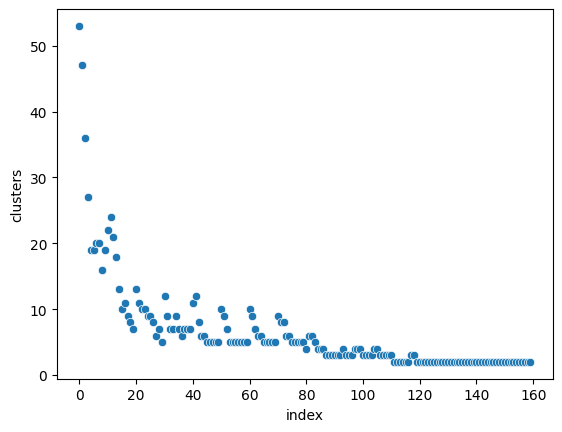

In [14]:
sns.scatterplot(x = df_dbscan_results.index, y = df_dbscan_results["clusters"])
mpl.xlabel("index")